In [28]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
import tensorflow as tf
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [2]:
df = pd.read_csv("IB_indexed.csv")

In [3]:
df = df.set_index(['UploadTime'])
df.index = pd.to_datetime(df.index)
# df.to_csv("IB_indexed.csv")

In [4]:
df_cc_resample = df.Usage_CC.resample('h').sum()

In [5]:
display(df_cc_resample)

UploadTime
2020-08-10 00:00:00     98754.0
2020-08-10 01:00:00    216580.0
2020-08-10 02:00:00    224280.0
2020-08-10 03:00:00    224280.0
2020-08-10 04:00:00    224164.0
                         ...   
2020-09-13 19:00:00    231078.0
2020-09-13 20:00:00    171252.0
2020-09-13 21:00:00    171480.0
2020-09-13 22:00:00    170635.0
2020-09-13 23:00:00     93794.0
Freq: H, Name: Usage_CC, Length: 840, dtype: float64

In [6]:
description = df_cc_resample.describe().transpose()
display(description)

count       840.000000
mean     176490.157143
std       51443.668562
min       31238.000000
25%      140520.000000
50%      176675.500000
75%      209464.500000
max      326492.000000
Name: Usage_CC, dtype: float64

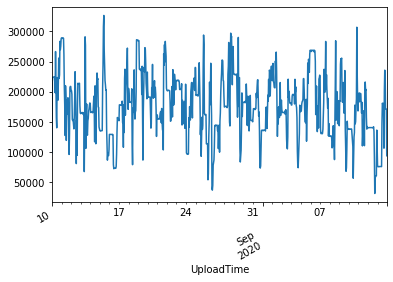

In [7]:
plot_features = df_cc_resample
plot_features.index = df_cc_resample.index
_ = plot_features.plot(subplots=True)
plt.show()

In [8]:
# for cyclical encoding
timestamp_s = df_cc_resample.index.map(datetime.datetime.timestamp)
print(timestamp_s)

Float64Index([1596988800.0, 1596992400.0, 1596996000.0, 1596999600.0,
              1597003200.0, 1597006800.0, 1597010400.0, 1597014000.0,
              1597017600.0, 1597021200.0,
              ...
              1599976800.0, 1599980400.0, 1599984000.0, 1599987600.0,
              1599991200.0, 1599994800.0, 1599998400.0, 1600002000.0,
              1600005600.0, 1600009200.0],
             dtype='float64', name='UploadTime', length=840)


In [9]:
# # converts time to two features representing cyclical time
# day = 24*60*60
# week = 7*day

# df_cc_resample.to_frame()

# df_cc_resample["day_cos"] = np.cos(timestamp_s * (2 * np.pi / day))
# df_cc_resample["day_sin"] = np.sin(timestamp_s * (2 * np.pi / day))
# df_cc_resample["week_cos"] = np.cos(timestamp_s * (2 * np.pi / week))
# df_cc_resample["week_sin"] = np.sin(timestamp_s * (2 * np.pi / week))

# display(df_cc_resample)

In [10]:
# converts time to two features representing cyclical time
day = 24*60*60
week = 7*day

day_cos = pd.DataFrame(np.cos(timestamp_s * (2 * np.pi / day)))
day_sin = pd.DataFrame(np.sin(timestamp_s * (2 * np.pi / day)))
week_cos = pd.DataFrame(np.cos(timestamp_s * (2 * np.pi / week)))
week_sin = pd.DataFrame(np.sin(timestamp_s * (2 * np.pi / week)))

# day_cos = day_cos.reshape((len(day_cos), 1))
# day_sin = day_sin.reshape((len(day_sin), 1))
# week_cos = week_cos.reshape((len(week_cos), 1))
# week_sin = week_sin.reshape((len(week_sin), 1))

print(day_cos)

       UploadTime
0   -5.000000e-01
1   -2.588190e-01
2   -1.125783e-11
3    2.588190e-01
4    5.000000e-01
..            ...
835 -9.659258e-01
836 -1.000000e+00
837 -9.659258e-01
838 -8.660254e-01
839 -7.071068e-01

[840 rows x 1 columns]


In [11]:
# df_cc_resample.append(day_cos)
df_cc_resample = df_cc_resample.to_frame()
print(type(df_cc_resample))
# df_cc_resample.merge(day_cos, how='left')

<class 'pandas.core.frame.DataFrame'>


In [12]:
df_cc_resample["day_cos"] = day_cos.set_index(df_cc_resample.index)
df_cc_resample["day_sin"] = day_sin.set_index(df_cc_resample.index)
df_cc_resample["week_cos"] = week_cos.set_index(df_cc_resample.index)
df_cc_resample["week_sin"] = week_sin.set_index(df_cc_resample.index)
print(df_cc_resample)

                     Usage_CC       day_cos       day_sin  week_cos  \
UploadTime                                                            
2020-08-10 00:00:00   98754.0 -5.000000e-01 -8.660254e-01 -0.988831   
2020-08-10 01:00:00  216580.0 -2.588190e-01 -9.659258e-01 -0.982566   
2020-08-10 02:00:00  224280.0 -1.125783e-11 -1.000000e+00 -0.974928   
2020-08-10 03:00:00  224280.0  2.588190e-01 -9.659258e-01 -0.965926   
2020-08-10 04:00:00  224164.0  5.000000e-01 -8.660254e-01 -0.955573   
...                       ...           ...           ...       ...   
2020-09-13 19:00:00  231078.0 -9.659258e-01  2.588190e-01 -0.999301   
2020-09-13 20:00:00  171252.0 -1.000000e+00  3.764785e-12 -1.000000   
2020-09-13 21:00:00  171480.0 -9.659258e-01 -2.588190e-01 -0.999301   
2020-09-13 22:00:00  170635.0 -8.660254e-01 -5.000000e-01 -0.997204   
2020-09-13 23:00:00   93794.0 -7.071068e-01 -7.071068e-01 -0.993712   

                         week_sin  
UploadTime                         
2020

In [13]:
df_cc_resample.to_csv("IB_daycos.csv")

In [14]:
df_periodicity = pd.read_csv("IB_daycos.csv")
df_periodicity = df_periodicity.set_index(['UploadTime'])
df_periodicity.index = pd.to_datetime(df_periodicity.index)
print(df_periodicity)

                     Usage_CC       day_cos       day_sin  week_cos  \
UploadTime                                                            
2020-08-10 00:00:00   98754.0 -5.000000e-01 -8.660254e-01 -0.988831   
2020-08-10 01:00:00  216580.0 -2.588190e-01 -9.659258e-01 -0.982566   
2020-08-10 02:00:00  224280.0 -1.125783e-11 -1.000000e+00 -0.974928   
2020-08-10 03:00:00  224280.0  2.588190e-01 -9.659258e-01 -0.965926   
2020-08-10 04:00:00  224164.0  5.000000e-01 -8.660254e-01 -0.955573   
...                       ...           ...           ...       ...   
2020-09-13 19:00:00  231078.0 -9.659258e-01  2.588190e-01 -0.999301   
2020-09-13 20:00:00  171252.0 -1.000000e+00  3.764785e-12 -1.000000   
2020-09-13 21:00:00  171480.0 -9.659258e-01 -2.588190e-01 -0.999301   
2020-09-13 22:00:00  170635.0 -8.660254e-01 -5.000000e-01 -0.997204   
2020-09-13 23:00:00   93794.0 -7.071068e-01 -7.071068e-01 -0.993712   

                         week_sin  
UploadTime                         
2020

In [17]:
n = len(df_periodicity)

train_mean = df_periodicity["Usage_CC"][0:int(n*0.7)].mean()
train_std = df_periodicity["Usage_CC"][0:int(n*0.7)].std()

df_periodicity["Usage_CC"] = (df_periodicity["Usage_CC"] - train_mean) / train_std
print(df_periodicity)

                     Usage_CC       day_cos       day_sin  week_cos  \
UploadTime                                                            
2020-08-10 00:00:00 -1.650070 -5.000000e-01 -8.660254e-01 -0.988831   
2020-08-10 01:00:00  0.708253 -2.588190e-01 -9.659258e-01 -0.982566   
2020-08-10 02:00:00  0.862371 -1.125783e-11 -1.000000e+00 -0.974928   
2020-08-10 03:00:00  0.862371  2.588190e-01 -9.659258e-01 -0.965926   
2020-08-10 04:00:00  0.860049  5.000000e-01 -8.660254e-01 -0.955573   
...                       ...           ...           ...       ...   
2020-09-13 19:00:00  0.998435 -9.659258e-01  2.588190e-01 -0.999301   
2020-09-13 20:00:00 -0.199000 -1.000000e+00  3.764785e-12 -1.000000   
2020-09-13 21:00:00 -0.194437 -9.659258e-01 -2.588190e-01 -0.999301   
2020-09-13 22:00:00 -0.211350 -8.660254e-01 -5.000000e-01 -0.997204   
2020-09-13 23:00:00 -1.749346 -7.071068e-01 -7.071068e-01 -0.993712   

                         week_sin  
UploadTime                         
2020

In [18]:
def to_stack(df, param):
    sequence = np.array(df[param])
    sequence = sequence.reshape((len(sequence), 1))
    return sequence
in_seq1 = to_stack(df_periodicity, "week_sin")
in_seq2 = to_stack(df_periodicity, "day_cos")
in_seq3 = to_stack(df_periodicity, "day_sin")
in_seq4 = to_stack(df_periodicity, "week_cos")
in_seq5 = to_stack(df_periodicity, "Usage_CC")

dataset = np.hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5))
print(dataset)

[[-1.49042266e-01 -5.00000000e-01 -8.66025404e-01 -9.88830826e-01
  -1.65006970e+00]
 [-1.85911607e-01 -2.58819045e-01 -9.65925826e-01 -9.82566473e-01
   7.08253321e-01]
 [-2.22520934e-01 -1.12578291e-11 -1.00000000e+00 -9.74927912e-01
   8.62371150e-01]
 ...
 [-3.73911943e-02 -9.65925826e-01 -2.58819045e-01 -9.99300705e-01
  -1.94436817e-01]
 [-7.47300936e-02 -8.66025404e-01 -5.00000000e-01 -9.97203797e-01
  -2.11349748e-01]
 [-1.11964476e-01 -7.07106781e-01 -7.07106781e-01 -9.93712210e-01
  -1.74934560e+00]]


In [19]:
# split data into train, val, and test
train_df = dataset[0:int(n*0.7)]
val_df = dataset[int(n*0.7):int(n*0.9)]
test_df = dataset[int(n*0.9):]

In [20]:
def split_window(sequence, steps):
    x_input, y_label = list(), list()
    for i in range(len(sequence)):
        window_end = i + steps
        if window_end == len(sequence):
            break
        x_input.append(sequence[i:window_end])
        y_label.append(sequence[window_end, -1])
    return np.array(x_input), np.array(y_label)

In [21]:
# x_input = list()
# x_temp = train_df[["Usage_CC", "day_cos"]]
# x_input.append(x_temp[0:5])
# print(type(x_input))
# print(x_input)
# for i in range(len(x_input)):
#     print(x_input[i])
# print(x_input[0])

In [22]:
# split to 6-hr windows, 5 inputs and 1 label
n_steps = 5
x_train, y_train = split_window(train_df, n_steps)
x_val, y_val = split_window(val_df, n_steps)
x_test, y_test = split_window(test_df, n_steps)
print(x_train.shape, y_train.shape)
n_features = x_train.shape[2]
for i in range(2):
    print(x_train[i])
    print(y_train[i])

(583, 5, 5) (583,)
[[-1.49042266e-01 -5.00000000e-01 -8.66025404e-01 -9.88830826e-01
  -1.65006970e+00]
 [-1.85911607e-01 -2.58819045e-01 -9.65925826e-01 -9.82566473e-01
   7.08253321e-01]
 [-2.22520934e-01 -1.12578291e-11 -1.00000000e+00 -9.74927912e-01
   8.62371150e-01]
 [-2.58819045e-01  2.58819045e-01 -9.65925826e-01 -9.65925826e-01
   8.62371150e-01]
 [-2.94755174e-01  5.00000000e-01 -8.66025404e-01 -9.55572806e-01
   8.60049375e-01]]
0.862371149683645
[[-1.85911607e-01 -2.58819045e-01 -9.65925826e-01 -9.82566473e-01
   7.08253321e-01]
 [-2.22520934e-01 -1.12578291e-11 -1.00000000e+00 -9.74927912e-01
   8.62371150e-01]
 [-2.58819045e-01  2.58819045e-01 -9.65925826e-01 -9.65925826e-01
   8.62371150e-01]
 [-2.94755174e-01  5.00000000e-01 -8.66025404e-01 -9.55572806e-01
   8.60049375e-01]
 [-3.30279062e-01  7.07106781e-01 -7.07106781e-01 -9.43883330e-01
   8.62371150e-01]]
0.862371149683645


In [29]:
# vanilla lstm: only one hidden layer of lstm + one output layer
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', # optimizer
              loss='mse',
             metrics=[tf.metrics.MeanAbsoluteError()]) 

In [30]:
# fit model
model.fit(x_train, y_train, epochs=200, verbose=0
          , validation_data=(x_val, y_val)
         )

In [31]:
# evaluate model using test data
results = model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 794us/step - loss: 0.8971 - mean_absolute_error: 0.6135


In [32]:
# generate predictions
predictions = model.predict(x_test, verbose=0)
print(predictions[:5])

[[ 0.19800746]
 [ 0.0086763 ]
 [-0.04998495]
 [-0.02042718]
 [ 0.9813568 ]]


In [33]:
print(y_train.shape)

(583,)


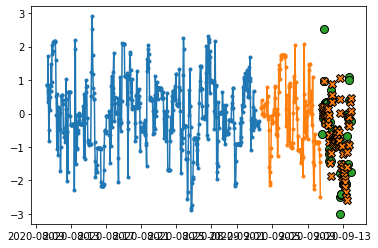

In [34]:
# blue line
plt.plot(df_periodicity.index[n_steps:int(n*0.7)], y_train,
        label='Inputs', marker='.', zorder=-10)
# purple line
plt.plot(df_periodicity.index[int(n*0.7)+n_steps:int(n*0.9)], y_val,
        label='Val', marker='.', zorder=-10)
# green dots
plt.scatter(df_periodicity.index[int(n*0.9)+n_steps:], y_test,
            edgecolors='k', label='Labels', c='#2ca02c', s=64)
# orange x's
plt.scatter(df_periodicity.index[int(n*0.9)+n_steps:], predictions,
            marker='X', edgecolors='k', label='Predictions',
            c='#ff7f0e', s=64)

(18516.0, 18518.0)

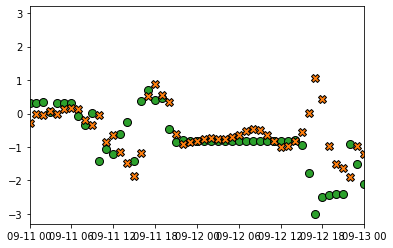

In [35]:
# blue line
plt.plot(df_periodicity.index[n_steps:int(n*0.7)], y_train,
        label='Inputs', marker='.', zorder=-10)
# purple line
plt.plot(df_periodicity.index[int(n*0.7)+n_steps:int(n*0.9)], y_val,
        label='Val', marker='.', zorder=-10)
# green dots
plt.scatter(df_periodicity.index[int(n*0.9)+n_steps:], y_test,
            edgecolors='k', label='Labels', c='#2ca02c', s=64)
# orange x's
plt.scatter(df_periodicity.index[int(n*0.9)+n_steps:], predictions,
            marker='X', edgecolors='k', label='Predictions',
            c='#ff7f0e', s=64)
axes = plt.gca()
axes.set_xlim([datetime.datetime.strptime("2020-09-11 00:00:00", "%Y-%m-%d %H:%M:%S"), datetime.datetime.strptime("2020-09-13 00:00:00", "%Y-%m-%d %H:%M:%S")])

In [36]:
def calc_rmse(pred_arr, actual_arr):
    total = 0
    for i in range(len(pred_arr)):
        total+=pow((pred_arr[i] - actual_arr[i]),2)
    rmse = pow(total/len(pred_arr), 1/2)
    return rmse
def calc_mae(pred_arr, actual_arr):
    total = 0
    for i in range(len(pred_arr)):
        total+=abs(actual_arr[i]-pred_arr[i])
    mae = total/len(pred_arr)
    return mae
def calc_mape(pred_arr, actual_arr):
    total = 0
    for i in range(len(pred_arr)):
        total+=abs((actual_arr[i]-pred_arr[i])*(100/actual_arr[i]))
    mape = total/len(pred_arr)
    return mape

In [37]:
print("RMSE: " + str(calc_rmse(predictions, y_test)))
print("MAE: " + str(calc_mae(predictions, y_test)))
print("MAPE: " + str(calc_mape(predictions, y_test)))

RMSE: [0.94715667]
MAE: [0.61347175]
MAPE: [580.1188]
